<a href="https://colab.research.google.com/github/ernesto-miguez/Machine-Learning-training/blob/master/Space_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading data

In [ ]:
strPath = "./text.txt"

In [ ]:
fileObject = open(strPath)

In [ ]:
text_list = fileObject.readlines()
fileObject.close()

In [ ]:
for text in text_list:
  print(text)

First Astronaut on the moon

Neil Armstrong



In [ ]:
first_line = text_list[0]
print(first_line)

First Astronaut on the moon



In [ ]:
second_line = text_list[1]
print(second_line)

Neil Armstrong



## Modify variables inside a function

### Option 1: Global variables

In [ ]:
rocketText = "We will launch in"

def OutputRocketText():
  global rocketText
  rocketText += " two days"

  return

OutputRocketText()
print(rocketText)

We will launch in two days


## Option 2: Using parameters

In [ ]:
def OutputRocketText(textInput):
  textInput += " two days"
  return textInput

rocketText = "We will launch in"
newRocketTexT = OutputRocketText(rocketText)
print(newRocketTexT)

We will launch in two days


## Moon Rocks

In [ ]:
print("Artemis Rover Rock Scanner Starting")

Artemis Rover Rock Scanner Starting


In [ ]:
basalt = 0
breccia = 0
highland = 0
regolith = 0
rockList = []

In [ ]:
# Read the data
path = "./rocks.txt"
fileObject = open(path)
line = fileObject.readline()
print(line)

Reading Rocks



In [ ]:
rockList = fileObject.readlines()

for rocks in rockList:
  print(rocks)

fileObject.close()

basalt

breccia

highland

regolith

highland

breccia

highland

regolith

regolith

basalt

highland

basalt

breccia

breccia

regolith

breccia

highland

highland

breccia

basalt


In [ ]:
 def countrocks(rocks):
   global basalt
   global breccia
   global highland
   global regolith

   rocks = [rock.lower() for rock in rocks]
   
   for rock in rocks:
    if "basalt" in rock:
      basalt += 1
    elif "breccia" in rock:
      breccia += 1
    elif "highland" in rock:
      highland += 1
    elif "regolith" in rock:
      regolith += 1
      
   return {"basalt": basalt, "breccia": breccia, "highland": highland, "regolith": regolith}

In [ ]:
countrocks(rockList)

{'basalt': 4, 'breccia': 6, 'highland': 6, 'regolith': 4}

In [ ]:
print("The max number of one type of rock found was:", max(basalt, breccia, highland, regolith))
print("The min number of one type of rock found was:", min(basalt, breccia, highland, regolith))

The max number of one type of rock found was: 6
The min number of one type of rock found was: 4


## Analyze images of space rocks by using AI

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AGXP6mr8wCBnJ1MQIxTfR8lWFA5BqYCvVAQpE1Km7xWjqmXKwJnQ5g
Mounted at /content/gdrive


In [ ]:
data_dir = "gdrive/My Drive/Data"

def load_split_train_test(datadir, valid_size = .2):
  train_transforms = transforms.Compose([
                                         transforms.RandomResizedCrop(224),
                                         transforms.Resize(224),
                                         transforms.ToTensor(),
                                         ])
  
  test_transforms = transforms.Compose([
                                        transforms.RandomResizedCrop(224),
                                        transforms.Resize(224),
                                        transforms.ToTensor(),
                                        ])
  
  train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
  test_data = datasets.ImageFolder(data_dir, transform=test_transforms)

  num_train = len(train_data)
  indices = list(range(num_train))
  split = int(np.floor(valid_size * num_train))
  np.random.shuffle(indices)
  from torch.utils.data.sampler import SubsetRandomSampler
  train_idx, test_idx = indices[split:], indices[:split]
  train_sampler = SubsetRandomSampler(train_idx)
  test_sampler = SubsetRandomSampler(test_idx)
  trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
  testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)
  return trainloader, testloader

In [ ]:
trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)

['Basalt', 'Highland']


In [ ]:
test_transforms = transforms.Compose([
                                        transforms.RandomResizedCrop(224),
                                        transforms.Resize(224),
                                        transforms.ToTensor(),
                                        ])


def get_random_images(num):
  data = datasets.ImageFolder(data_dir, transform=test_transforms)
  classes = data.classes
  indices = list(range(len(data)))
  np.random.shuffle(indices)
  idx = indices[:num]
  from torch.utils.data.sampler import SubsetRandomSampler
  sampler = SubsetRandomSampler(idx)
  loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num)
  dataiter = iter(loader)
  images, labels = dataiter.next()
  return images, labels

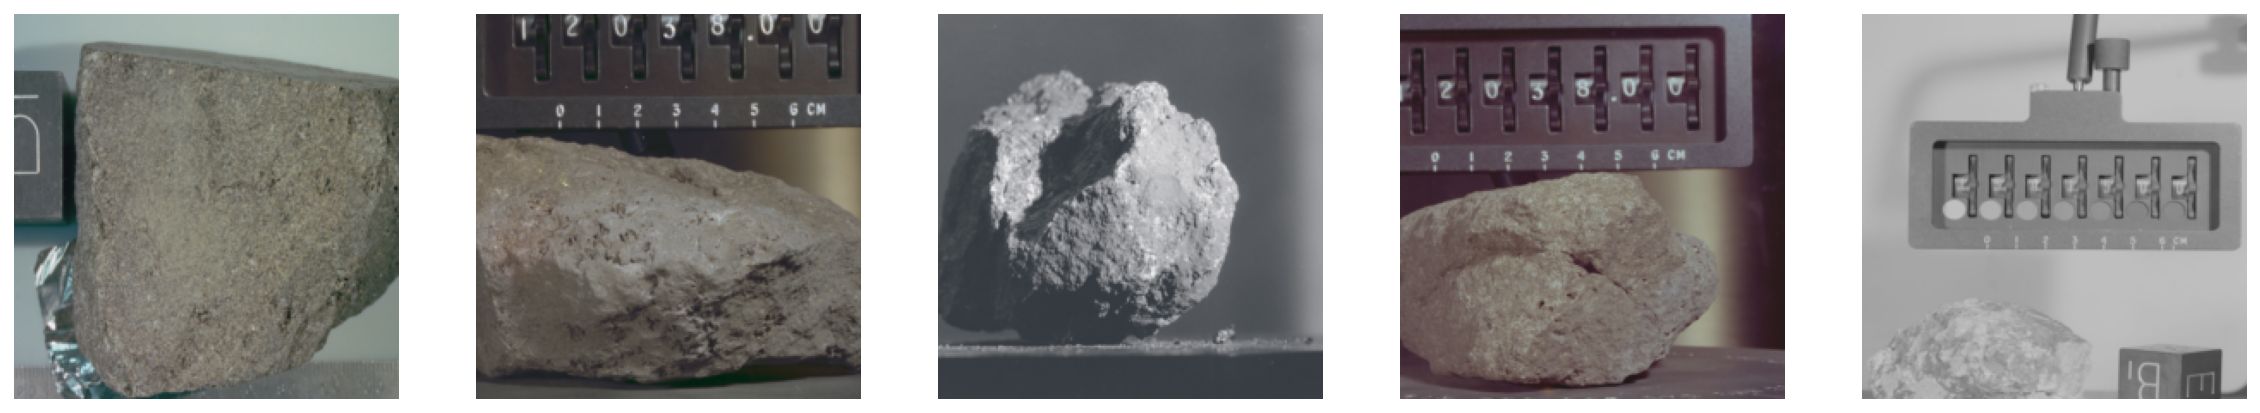

In [ ]:
images, labels = get_random_images(5)
to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(20,20))
classes = trainloader.dataset.classes
for i in range(len(images)):
  image = to_pil(images[i])
  sub = fig.add_subplot(1, len(images), i+1)
  plt.axis('off')
  plt.imshow(image)
plt.show()

## Build a neural network

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
# Build all the neurons
for param in model.parameters():
  param.requires_grad = False

# The parameter of our deep learning model
model.fc = nn.Sequential(nn.Linear(2048, 512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512, 2),
                         nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)
print('done')


done


In [ ]:
from torchsummary import summary

summary(model, (3,2048,512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 64, 1024, 256]           9,408
       BatchNorm2d-2        [-1, 64, 1024, 256]             128
              ReLU-3        [-1, 64, 1024, 256]               0
         MaxPool2d-4         [-1, 64, 512, 128]               0
            Conv2d-5         [-1, 64, 512, 128]           4,096
       BatchNorm2d-6         [-1, 64, 512, 128]             128
              ReLU-7         [-1, 64, 512, 128]               0
            Conv2d-8         [-1, 64, 512, 128]          36,864
       BatchNorm2d-9         [-1, 64, 512, 128]             128
             ReLU-10         [-1, 64, 512, 128]               0
           Conv2d-11        [-1, 256, 512, 128]          16,384
      BatchNorm2d-12        [-1, 256, 512, 128]             512
           Conv2d-13        [-1, 256, 512, 128]          16,384
      BatchNorm2d-14        [-1, 256, 5

## Train the neural network

In [ ]:
epochs = 10
steps = 0
running_loss = 0
print_every = 5
train_losses, test_losses = [], []

for epoch in range(epochs):
  for inputs, labels in trainloader:

    steps += 1
    print('Training step', steps)
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    logps = model.forward(inputs)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if steps % print_every == 0:
      test_loss = 0
      accuracy = 0
      model.eval()
      with torch.no_grad():
        for inputs, labels in testloader:
          inputs, labels = inputs.to(device), labels.to(device)
          logps = model.forward(inputs)
          batch_loss = criterion(logps, labels)
          test_loss += batch_loss.item()

          ps = torch.exp(logps)
          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

      train_losses.append(running_loss/len(trainloader))
      test_losses.append(running_loss/len(testloader))
      print(f"Epoch {epoch+1}/{epochs}.. "
            f"Train loss: {running_loss/print_every:.3f}.."
            f"Test loss: {test_loss/len(testloader):.3f}.."
            f"Test accuracy: {accuracy/len(testloader):.3f}")
      running_loss = 0
      model.train()

Training step 1
Training step 2
Training step 3
Training step 4
Training step 5
Epoch 1/10.. Train loss: 1.910..Test loss: 1.819..Test accuracy: 0.581
Training step 6
Training step 7
Training step 8
Training step 9
Training step 10
Epoch 2/10.. Train loss: 1.250..Test loss: 0.626..Test accuracy: 0.579
Training step 11
Training step 12
Training step 13
Training step 14
Training step 15
Epoch 2/10.. Train loss: 0.449..Test loss: 0.416..Test accuracy: 0.806
Training step 16
Training step 17
Training step 18
Training step 19
Training step 20
Epoch 3/10.. Train loss: 0.433..Test loss: 0.373..Test accuracy: 0.871
Training step 21
Training step 22
Training step 23
Training step 24
Training step 25
Epoch 4/10.. Train loss: 0.546..Test loss: 0.345..Test accuracy: 0.871
Training step 26
Training step 27
Training step 28
Training step 29
Training step 30
Epoch 4/10.. Train loss: 0.309..Test loss: 0.290..Test accuracy: 0.900
Training step 31
Training step 32
Training step 33
Training step 34
Train

In [ ]:
print(accuracy/len(testloader))

0.9375


## Saving and loading the model (Wouldn't need to train again if we load the model here)

In [ ]:
torch.save(model, 'aerialmodel.pth')

In [ ]:
# model = torch.load('aerialmodel.pth')

## Predict the type of rock in a new image

In [ ]:
def predict_image(image):
  image_tensor = test_transforms(image).float()
  image_tensor = image_tensor.unsqueeze_(0)
  input = Variable(image_tensor)
  input = input.to(device)
  output = model(input)
  index = output.data.cpu().numpy().argmax()
  return index

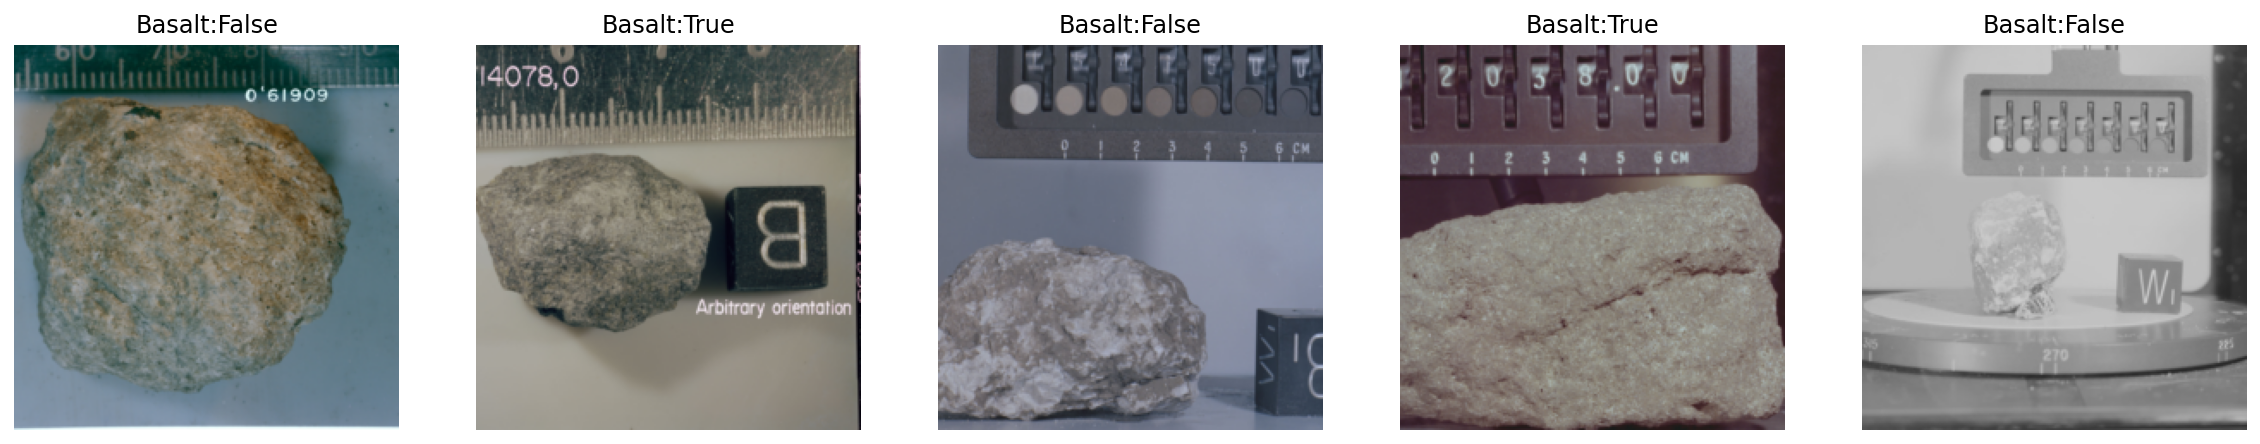

In [ ]:
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig = plt.figure(figsize=(20,20))

classes = trainloader.dataset.classes
for i in range(len(images)):
  image = to_pil(images[i])
  index = predict_image(image)
  sub = fig.add_subplot(1, len(images), i+1)
  res = int(labels[i]) == index
  sub.set_title(str(classes[index]) + ":" + str(res))
  plt.axis('off')
  plt.imshow(image)
plt.show()

## Predict rocket launch delays with machine learning

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import preprocessing

import pydotplus
from IPython.display import Image

In [ ]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,0.0,0.08,N,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,0.0,0.09,E,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [ ]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [ ]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

## Preprocess the data

In [ ]:
launch_data['Launched?'].fillna('N', inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed', inplace=True)
launch_data['Wind Direction'].fillna('unknown', inplace=True)
launch_data['Condition'].fillna('fair', inplace=True)
launch_data.fillna(0, inplace=True)

In [ ]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.0,0.08,N,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.0,0.09,E,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [ ]:
y = launch_data['Launched?']

launch_data.drop(['Name', 'Date', 'Time (East Coast)', 'Location', 'Launched?', 'Hist Ave Sea Level Pressure', 'Sea Level Pressure', 'Day Length', 'Notes', 'Hist Ave Visibility', 'Hist Ave Max Wind Speed'], axis=1, inplace=True)

X = launch_data

In [ ]:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

In [ ]:
# Converting Crewed or Uncrewed variable into categorical variable
Crewed = []

for i in X['Crewed or Uncrewed']:
  if i == 'Crewed':
    Crewed.append(1)
  else:
    Crewed.append(0)

X['Crewed'] = Crewed
X.drop(['Crewed or Uncrewed'], axis=1, inplace=True)

# Converting Wind Direction and Condition columns into one-hot-encoding
X = pd.get_dummies(X, columns=['Wind Direction', "Condition"], prefix=["Direction", "Condition"])

In [ ]:
X.head()

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Max Wind Speed,Visibility,Wind Speed at Launch Time,Crewed,Direction_E,Direction_N,Direction_NE,Direction_NW,Direction_S,Direction_SE,Direction_SW,Direction_W,Direction_unknown,Condition_Cloudy,Condition_Fair,Condition_Heavy T-Storm,Condition_Light Rain,Condition_Mostly Cloudy,Condition_Partly Cloudly,Condition_Partly Cloudy,Condition_Rain,Condition_T-Storm,Condition_Thunder,Condition_Windy,Condition_fair
0,75.0,68.0,71.00,0.0,75.0,55.0,65.0,0.0,0.08,16.0,15.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,78.0,70.0,73.39,0.0,75.0,55.0,65.0,0.0,0.09,14.0,10.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,73.0,0.0,60.21,62.0,75.0,55.0,65.0,0.0,0.09,15.0,10.0,11.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,76.0,57.0,66.04,0.0,75.0,55.0,65.0,0.0,0.08,10.0,10.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,79.0,60.0,70.52,0.0,75.0,55.0,65.0,0.0,0.09,12.0,10.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   High Temp                     300 non-null    float64
 1   Low Temp                      300 non-null    float64
 2   Ave Temp                      300 non-null    float64
 3   Temp at Launch Time           300 non-null    float64
 4   Hist High Temp                300 non-null    float64
 5   Hist Low Temp                 300 non-null    float64
 6   Hist Ave Temp                 300 non-null    float64
 7   Percipitation at Launch Time  300 non-null    float64
 8   Hist Ave Percipitation        300 non-null    float64
 9   Max Wind Speed                300 non-null    float64
 10  Visibility                    300 non-null    float64
 11  Wind Speed at Launch Time     300 non-null    float64
 12  Crewed                        300 non-null    int64  
 13  Direc

## Creating the model

In [ ]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

## Training the model

In [ ]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Test the model

In [15]:
y_pred = tree_model.predict(X_test)
print(y_pred)

['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']


## Score the model

In [16]:
tree_model.score(X_test, y_test)

0.9833333333333333

## Visualization

In [17]:
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
  tree_str = export_graphviz(tree, feature_names=feature_names, class_names = class_names,
                             filled=True, out_file=None)
  graph = pydotplus.graph_from_dot_data(tree_str)
  return Image(graph.create_png())

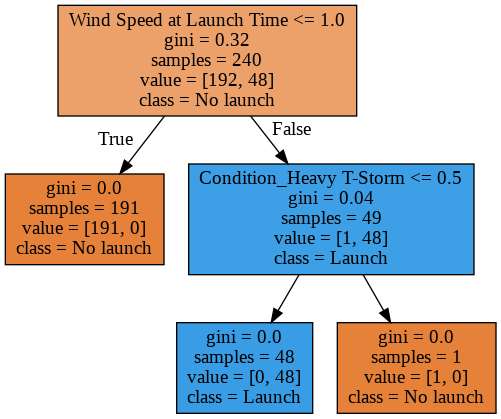

In [18]:
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values, class_names=['No launch', 'Launch'], png_file_to_save='decision_tree.png')

In [19]:
launch_data[(launch_data['Wind Speed at Launch Time'] > 1) & (launch_data['Max Wind Speed'] > 30.5)]

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition,Crewed
292,86.0,70.0,75.02,74.0,87.0,70.0,79.0,0.28,0.15,S,32.0,10.0,25.0,Heavy T-Storm,1


## Predict new example

In [20]:
X.columns

Index(['High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Max Wind Speed', 'Visibility', 'Wind Speed at Launch Time', 'Crewed',
       'Direction_E', 'Direction_N', 'Direction_NE', 'Direction_NW',
       'Direction_S', 'Direction_SE', 'Direction_SW', 'Direction_W',
       'Direction_unknown', 'Condition_Cloudy', 'Condition_Fair',
       'Condition_Heavy T-Storm', 'Condition_Light Rain',
       'Condition_Mostly Cloudy', 'Condition_Partly Cloudly',
       'Condition_Partly Cloudy', 'Condition_Rain', 'Condition_T-Storm',
       'Condition_Thunder', 'Condition_Windy', 'Condition_fair'],
      dtype='object')

In [21]:
X_test.head()

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Max Wind Speed,Visibility,Wind Speed at Launch Time,Crewed,Direction_E,Direction_N,Direction_NE,Direction_NW,Direction_S,Direction_SE,Direction_SW,Direction_W,Direction_unknown,Condition_Cloudy,Condition_Fair,Condition_Heavy T-Storm,Condition_Light Rain,Condition_Mostly Cloudy,Condition_Partly Cloudly,Condition_Partly Cloudy,Condition_Rain,Condition_T-Storm,Condition_Thunder,Condition_Windy,Condition_fair
43,87.0,79.0,82.67,0.0,91.0,73.0,82.0,0.00,0.21,10.0,20.0,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
15,80.0,46.0,62.75,0.0,78.0,59.0,69.0,0.00,0.09,13.0,10.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
271,92.0,0.0,68.30,0.0,90.0,73.0,82.0,0.10,0.24,17.0,10.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
137,82.0,73.0,77.63,81.0,84.0,68.0,76.0,0.00,0.16,17.0,10.0,12.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
214,81.0,0.0,50.49,0.0,84.0,65.0,74.0,0.04,0.08,13.0,10.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
data_input = [75., 68., 71., 0., 75., 55., 65., 0., 0.08, 16., 15., 0., 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

tree_model.predict([data_input])

array(['N'], dtype=object)